## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Импорт библиотек

In [2]:
telecom_users = pd.read_csv('telecom_users.csv', index_col=0)
telecom_users.head(5)
# Загрузка датасета

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
telecom_users.columns = map(str.lower, telecom_users.columns)
# Перевод заголовки столбцов в нижний регистр

In [4]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   seniorcitizen     5986 non-null   int64  
 3   partner           5986 non-null   object 
 4   dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   phoneservice      5986 non-null   object 
 7   multiplelines     5986 non-null   object 
 8   internetservice   5986 non-null   object 
 9   onlinesecurity    5986 non-null   object 
 10  onlinebackup      5986 non-null   object 
 11  deviceprotection  5986 non-null   object 
 12  techsupport       5986 non-null   object 
 13  streamingtv       5986 non-null   object 
 14  streamingmovies   5986 non-null   object 
 15  contract          5986 non-null   object 
 16  paperlessbilling  5986 non-null   object

In [5]:
len(telecom_users[telecom_users['churn']=='Yes']['churn'])/len(telecom_users['churn'])
# Расчет оттока клиентов


0.2651186100902105

Около 26.5% клиентов ушло

In [6]:
telecom_users['monthlycharges'].aggregate([np.min, np.max, np.mean, np.median])
# Минимальный, максимальный, средний, медианный месячный размер оплаты

amin       18.250000
amax      118.750000
mean       64.802213
median     70.400000
Name: monthlycharges, dtype: float64

In [7]:
telecom_users['gender'] = telecom_users['gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
replacement = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
for i in replacement:
    telecom_users[i] = telecom_users[i].map( {'No': 0, 'Yes': 1} ).astype(int)
telecom_users['multiplelines'] = telecom_users['multiplelines'].map( {'Yes':1, 'No':0, 'No phone service':2} ).astype(int)
telecom_users['internetservice'] = telecom_users['internetservice'].map( {'DSL':1, 'Fiber optic':2, 'No':0} ).astype(int)
replacement = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv','streamingmovies']
for i in replacement:
    telecom_users[i] = telecom_users[i].map( {'No': 0, 'Yes': 1, 'No internet service':2} ).astype(int)
telecom_users['contract'] = telecom_users['contract'].map( {'Month-to-month':0, 'One year':1, 'Two year':2} ).astype(int)
telecom_users['paymentmethod'] = telecom_users['paymentmethod'].map( {
    'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3
     } ).astype(int)
telecom_users = telecom_users.drop(columns=['customerid'])
telecom_users['totalcharges'].replace(' ', 0, inplace=True)
telecom_users['totalcharges']=telecom_users['totalcharges'].astype('float')
telecom_users.head(5)
# Преорбразование в числовой формат

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1869,1,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,3,24.10,1734.65,0
4528,0,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,3,88.15,3973.20,0
6344,0,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,2,74.95,2869.85,1
6739,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,0,55.90,238.50,0
432,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,0,53.45,119.50,0


# 2. Исследование зависимостей и формулирование гипотез

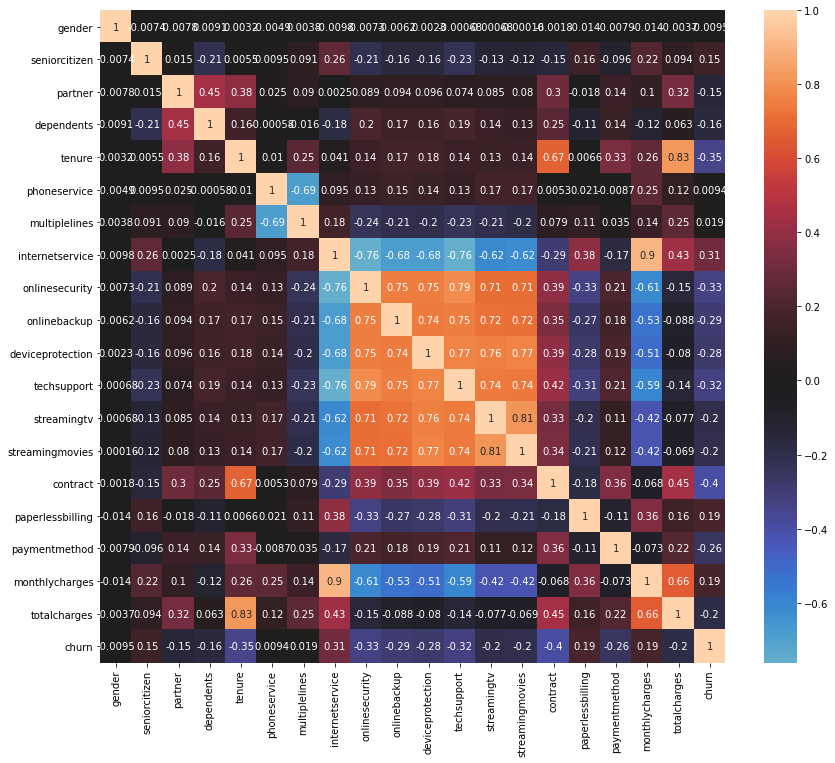

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(telecom_users.corr(), center=0, annot=True)
plt.show()
# Построение корреляционной heatmap

internetservice и monthlycharges имеют весьма высокую корреляцию по шкале Чеддока. onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv и streamingmovies имеют высокую корреляцию. totalcharges и tenure также имеют высокую корреляцию.

In [9]:
telecom_users = telecom_users.drop(columns=['internetservice','onlinesecurity','onlinebackup','streamingtv',
                                            'streamingmovies','totalcharges','deviceprotection',
                                           ])
telecom_users
# Отброшу часть данных, которые сильно коррелируют между собой

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,contract,paperlessbilling,paymentmethod,monthlycharges,churn
1869,1,0,1,1,72,1,1,2,2,0,3,24.10,0
4528,0,0,0,0,44,1,0,0,0,1,3,88.15,0
6344,0,1,1,0,38,1,1,0,0,1,2,74.95,1
6739,1,0,0,0,4,1,0,0,0,1,0,55.90,0
432,1,0,0,0,2,1,0,0,0,0,0,53.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,0,0,1,0,95.00,1
5191,0,0,1,1,23,1,1,1,2,1,3,91.10,0
5226,1,0,1,1,12,1,0,2,0,1,0,21.15,0
5390,1,1,0,0,12,1,1,0,0,1,0,99.45,1


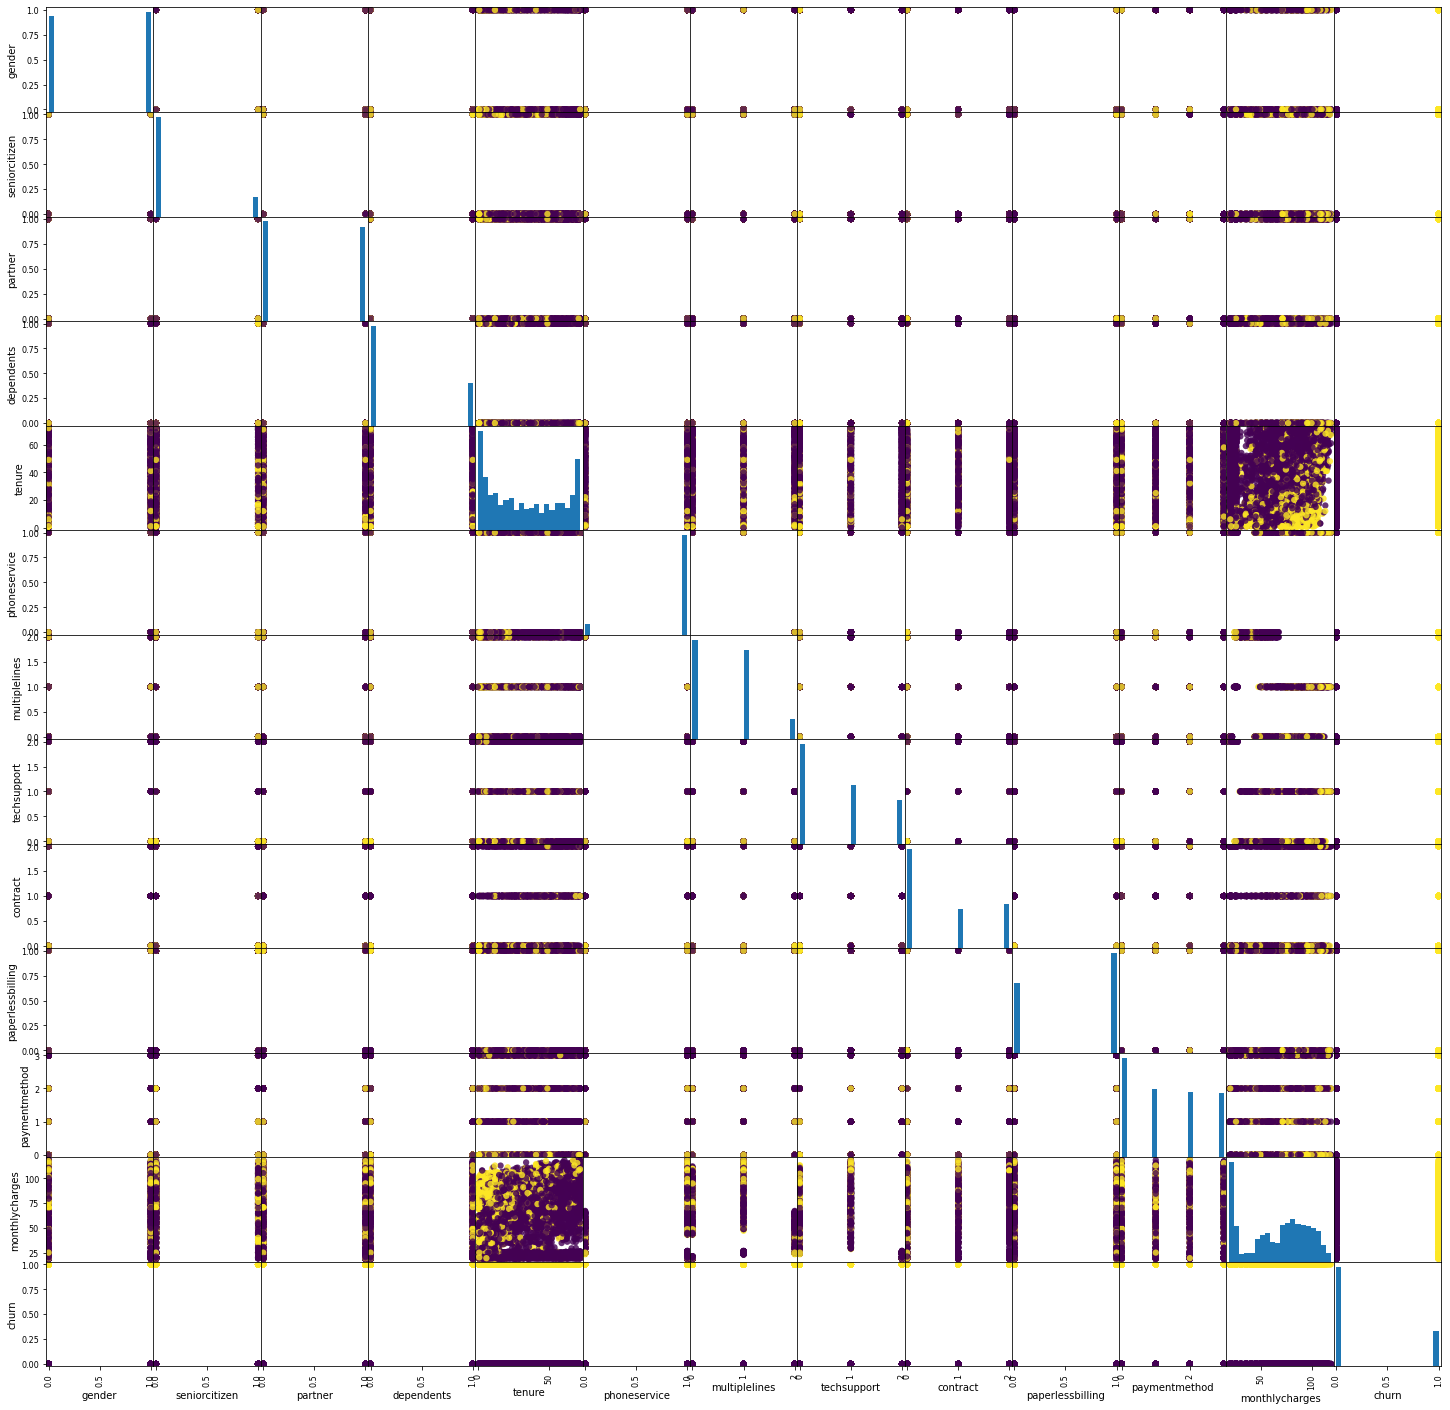

In [10]:
scat_mtrx = pd.plotting.scatter_matrix(telecom_users, c=telecom_users['churn'], figsize=(25, 25), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

# 3. Построение моделей для прогнозирования оттока

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score, classification_report, confusion_matrix, accuracy_score)
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split( telecom_users.drop(columns='churn'), telecom_users.churn,
                                                                    test_size=.3, random_state=17)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# Импорт библиотек и разделение датафрейма

In [12]:
lr = LogisticRegression(random_state=17, solver='liblinear')
lr_model = lr.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(x_test)[:,1])
print(f'LogisticRegression roc_auc_scorey: {auc_lr}')
print(classification_report(y_test, lr_predictions))
# Обучение LogisticRegression

LogisticRegression roc_auc_scorey: 0.8273135743502122
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1332
           1       0.62      0.50      0.55       464

    accuracy                           0.79      1796
   macro avg       0.73      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796



In [13]:
rf = RandomForestClassifier(random_state=17)
rf_model = rf.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:,1])
print(f'RandomForestClassifier roc_auc_scorey: {auc_rf}')
print(classification_report(y_test, rf_predictions))
# Обучение RandomForestClassifier

RandomForestClassifier roc_auc_scorey: 0.8053767668530599
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1332
           1       0.58      0.43      0.50       464

    accuracy                           0.77      1796
   macro avg       0.70      0.66      0.67      1796
weighted avg       0.76      0.77      0.76      1796



In [14]:
gb = GradientBoostingClassifier(random_state=17)
gb_model = gb.fit(x_train, y_train)
gb_predictions = gb_model.predict(x_test)
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(x_test)[:,1])
print(f'GradientBoostingClassifier roc_auc_scorey: {auc_gb}')
print(classification_report(y_test, gb_predictions))
# Обучение GradientBoostingClassifier

GradientBoostingClassifier roc_auc_scorey: 0.8347854859169515
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1332
           1       0.65      0.49      0.56       464

    accuracy                           0.80      1796
   macro avg       0.74      0.70      0.72      1796
weighted avg       0.79      0.80      0.79      1796



In [15]:
xgb = XGBClassifier(random_state=17)
xgb_model = xgb.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)
auc_xgb = roc_auc_score(y_test,xgb_model.predict_proba(x_test)[:,1])
print(f'GradientBoostingClassifier roc_auc_scorey: {auc_xgb}')
print(classification_report(y_test, xgb_predictions))
# Обучение XGBClassifier

GradientBoostingClassifier roc_auc_scorey: 0.8157068706637672
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1332
           1       0.60      0.52      0.56       464

    accuracy                           0.79      1796
   macro avg       0.72      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796



Наилучшие метрики получились у GradientBoostingClassifier, попробую улучшить модели подбором параметров с помощью GridSearchCV и стакинга

# 4. Сравнение качества моделей 

In [16]:
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold)
gb_params = {'learning_rate': np.arange(0.1, 1, 0.1),}

rf_params = {'n_estimators': range(1, 150, 10),
              'min_samples_leaf': range(1, 10)}

lr_params = {'C': np.arange(0.1, 1, 0.1),}

xgb_params = {'n_estimators': range(0, 100, 20),
              'eta': np.arange(0.1, 1, .2),
              'min_child_weight': range(1, 10, 2),
              'subsample': np.arange(0.1, 1, 0.2)}
# Параметры алгоритмов

In [18]:
skf = StratifiedKFold(n_splits=5, random_state=17)
gb=GridSearchCV(GradientBoostingClassifier(), gb_params, cv=skf, n_jobs = -1)
rf=GridSearchCV(RandomForestClassifier(), rf_params, cv=skf, n_jobs = -1)
lr=GridSearchCV(LogisticRegression(solver='liblinear'), lr_params,  cv=skf, n_jobs = -1)
xgb=GridSearchCV(XGBClassifier(), xgb_params, cv=skf, n_jobs = -1)

In [19]:
gb_model=gb.fit(x_train, y_train)
gb_params = gb_model.best_params_
gb_predictions = gb_model.predict(x_test)
accuracy_gb = accuracy_score(y_test, gb_predictions)
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(x_test)[:,1])
print(f'GradientBoostingClassifier roc_auc_scorey: {auc_gb}')
print(classification_report(y_test, gb_predictions))
print('gbc',gb_params)
# Подбор параметров для GradientBoostingClassifier

GradientBoostingClassifier roc_auc_scorey: 0.8345654382831106
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1332
           1       0.65      0.49      0.56       464

    accuracy                           0.80      1796
   macro avg       0.74      0.70      0.72      1796
weighted avg       0.79      0.80      0.79      1796

gbc {'learning_rate': 0.1}


In [20]:
rf_model=rf.fit(x_train, y_train)
rf_params = rf_model.best_params_
rf_predictions = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, rf_predictions)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:,1])
print(f'RandomForestClassifier roc_auc_scorey: {auc_rf}')
print(classification_report(y_test, rf_predictions))
print('rf',rf_params)
# Подбор параметров для GradientBoostingClassifier

RandomForestClassifier roc_auc_scorey: 0.8302316324945636
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1332
           1       0.66      0.43      0.52       464

    accuracy                           0.80      1796
   macro avg       0.74      0.68      0.70      1796
weighted avg       0.78      0.80      0.78      1796

rf {'min_samples_leaf': 6, 'n_estimators': 51}


In [21]:
lr_model=lr.fit(x_train, y_train)
lr_params = lr_model.best_params_
lr_predictions = lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test, lr_predictions)
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(x_test)[:,1])
print(f'LogisticRegression roc_auc_scorey: {auc_lr}')
print(classification_report(y_test, lr_predictions))
print('lr',lr_params )
# Подбор параметров для GradientBoostingClassifier

LogisticRegression roc_auc_scorey: 0.8275400939732835
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1332
           1       0.62      0.50      0.55       464

    accuracy                           0.79      1796
   macro avg       0.73      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796

lr {'C': 0.1}


In [22]:
xgb_model = xgb.fit(x_train, y_train)
xgb_params = xgb_model.best_params_
auc_xgb = roc_auc_score(y_test,xgb_model.predict_proba(x_test)[:,1])
print(f'GradientBoostingClassifier roc_auc_scorey: {auc_xgb}')
print(classification_report(y_test, xgb_predictions))
print('xgb',xgb_params)
# Подбор параметров для GradientBoostingClassifier

GradientBoostingClassifier roc_auc_scorey: 0.8375207103655379
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1332
           1       0.60      0.52      0.56       464

    accuracy                           0.79      1796
   macro avg       0.72      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796

xgb {'eta': 0.1, 'min_child_weight': 5, 'n_estimators': 40, 'subsample': 0.1}


In [23]:
gbc=GradientBoostingClassifier(**gb_params,random_state=17)
rfc=RandomForestClassifier(**rf_params,random_state=17)
lr=LogisticRegression(**lr_params,solver='liblinear',random_state=17)
xgb = XGBClassifier(**xgb_params,random_state=17,cv=5)

In [24]:
def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
        meta_mtrx = np.empty((targets_train.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, method='predict', cv=cv)
            model.fit(data_train, targets_train)
        meta_alg.fit(meta_mtrx, targets_train)
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
        meta_predict = meta.predict(meta_mtrx_test)
        if targets_test is not True:
            print(f'Stacking AUC: {roc_auc_score(targets_test, meta_predict)}')
            print(classification_report(targets_test, meta_predict))
        return meta_predict
    elif test_size > 0 and test_size < 1:
        train, valid, train_true, valid_true = train_test_split(data_train, targets_train, test_size=test_size, random_state=random_state)
        meta_mtrx = np.empty((valid.shape[0], len(models)))
        for n, model in enumerate(models):
            model.fit(train, train_true)
            meta_mtrx[:, n] = model.predict(valid)
        meta_alg.fit(meta_mtrx, valid_true)
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
        meta_predict = meta.predict(meta_mtrx_test)
        if targets_test is not None:
            print(f'Stacking AUC: {roc_auc_score(targets_test, meta.predict_proba(meta_mtrx_test)[:,1])}')
            print(classification_report(targets_test, meta_predict))
        return meta_predict
    
    else:
        raise ValueError("test_size must be between 0 and 1")
# Создание функции стакинга

In [26]:
meta = xgb
models = [gb, rf, lr]
meta_predictions =stacking(data_train = x_train, data_test = x_test, targets_train = y_train, targets_test=y_test, test_size = 0.3, models = models, meta_alg = meta, random_state=17)

[16:30:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Stacking AUC: 0.7292241055710883
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1332
           1       0.65      0.45      0.53       464

    accuracy                           0.80      1796
   macro avg       0.74      0.68      0.70      1796
weighted avg       0.78      0.80      0.78      1796



In [27]:
print('Лучшие гиперпараметры моделей:')
print('GradientBoostingClassifier:', gb_params)
print('RandomForestClassifier:', rf_params)
print('LogisticRegression:', lr_params)
print('XGBClassifier:', xgb_params)
# Вывод лучших гиперпараметров

Лучшие гиперпараметры моделей:
GradientBoostingClassifier: {'learning_rate': 0.1}
RandomForestClassifier: {'min_samples_leaf': 6, 'n_estimators': 51}
LogisticRegression: {'C': 0.1}
XGBClassifier: {'eta': 0.1, 'min_child_weight': 5, 'n_estimators': 40, 'subsample': 0.1}


Лучшая модель GradientBoostingClassifier с метриками оценки auc: 0.8375 и accucary: 0.79.